## Data Science and Business Analytics Intern #GRIPSEP22

### Author: Mariyam Khatoon

## Task-1: Exploratory Data Analysis Using Decision Tree
## Task-2: Prediction Using Unsupervised ML (Level-Beginner)

## Source Python

### Library

In [1]:
import numpy as np
import matplotlib.pyplot as mplt
import pandas as pd
import seaborn as sbn
from sklearn.datasets import load_iris
import sklearn.metrics as skm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### Import Data Set

In [2]:
iris = load_iris()
X = iris.data[:,:]
y = iris.target

In [3]:
X[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [4]:
X.shape

(150, 4)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Checking Dependent Values

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Exploratory Data Analysis

### Converting the Dataset into DataFrame

In [7]:
data = pd.DataFrame(iris["data"],columns=["Sepal Length","Sepal Width","Petal Length","Petal Width"])

In [8]:
data.sample(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
13,4.3,3.0,1.1,0.1
70,5.9,3.2,4.8,1.8
44,5.1,3.8,1.9,0.4
135,7.7,3.0,6.1,2.3
41,4.5,2.3,1.3,0.3


In [9]:
data.shape

(150, 4)

#### Number of rows 150, and number of columns 5 in thedataset

### Data Cleaning

#### NULL (empty) values in the dataset

In [10]:
data.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
dtype: int64

##### There is no NULL (empty) values in the dataset

##### Duplicated values in the dataset

In [11]:
data.duplicated().sum()

1

###### There is one duplicated value in the dataset

### Removing duplicate values

In [12]:
data = data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

#### Descriptive Statistics

In [14]:
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  149 non-null    float64
 1   Sepal Width   149 non-null    float64
 2   Petal Length  149 non-null    float64
 3   Petal Width   149 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [16]:
data.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.118129,0.873738,0.820620
Sepal Width,-0.118129,1.000000,-0.426028,-0.362894
Petal Length,0.873738,-0.426028,1.000000,0.962772
Petal Width,0.820620,-0.362894,0.962772,1.000000


### Data Visualization

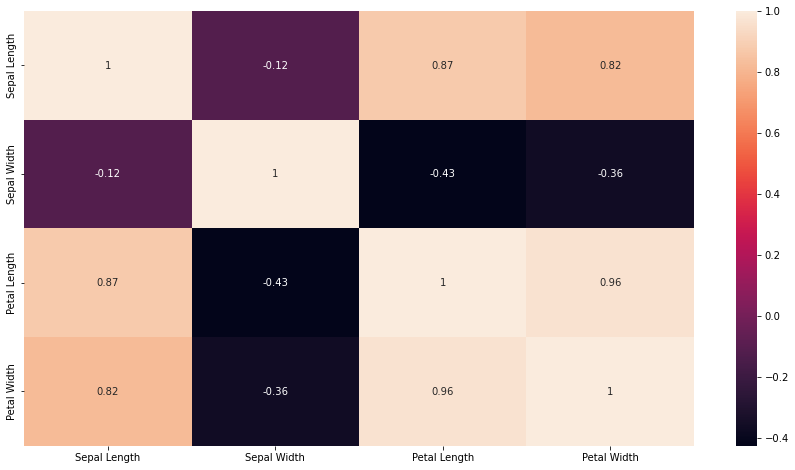

In [17]:
mplt.figure(figsize=(15,8))
sbn.heatmap(data.corr(),annot=True)
mplt.show()

#### Pairplot Plotting

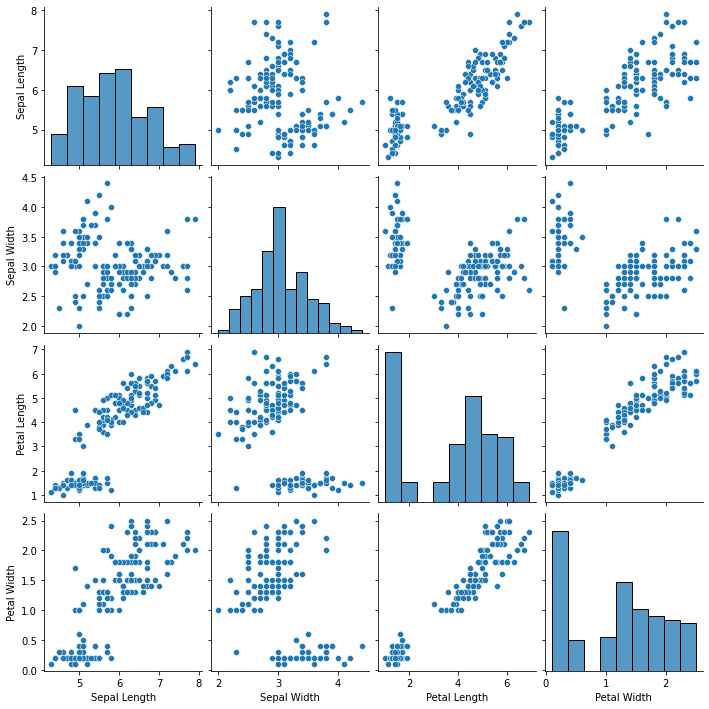

In [18]:
sbn.pairplot(data)
mplt.show()

#### Decision Tree Model Training for the Dataset

In [19]:
X_tain, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(X_tain,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dtc.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

## Comaparision Between Actual & Predicted values

In [22]:
pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


## Trained Model Visaulization

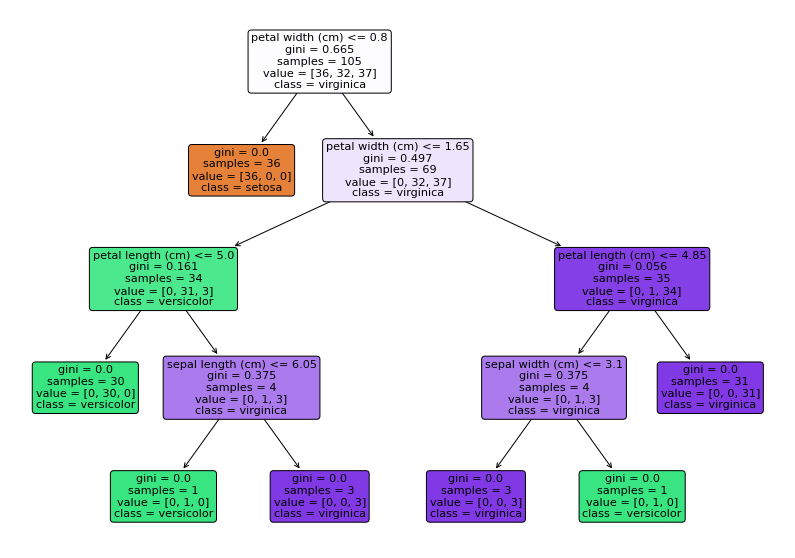

In [23]:
mplt.figure(figsize=(14,10))
tree.plot_tree(dtc, class_names=iris.target_names, feature_names=iris.feature_names[:], filled=True, rounded=True,)
mplt.show()

## New Data Feeding to Trained Model

### Prediction of Class Output for Few Random Feeds

In [27]:
pre_result = dtc.predict([[6.5, 3.4, 4.7, 2.1]])
if pre_result == [0]:
    print("setosa")
elif pre_result == [1]:
    print("versicolor")
else:
    print("virginica")

versicolor


## The Model Preduction for Values 6.5, 3.4, 4.7, 2.1 is 'versicolor'

In [31]:
pre_result = dtc.predict([[3.5, 5.9, 6.3, 8.7]])
if pre_result == [0]:
    print("setosa")
elif pre_result == [1]:
    print("versicolor")
else:
    print("virginica")

virginica


## The Model Preduction for Values 3.5, 5.9, 6.3, 8.7 is 'virginica'

## Model Accuracy

In [32]:
print("Accuracy Score: ",skm.accuracy_score(y_test, y_pred))

Accuracy Score:  0.9555555555555556


### The Model Accuracy is 0.95 or 95.56%

## Kmean Clusturing

In [33]:
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### The Elbow Method (Within Cluster Sum of Squares)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


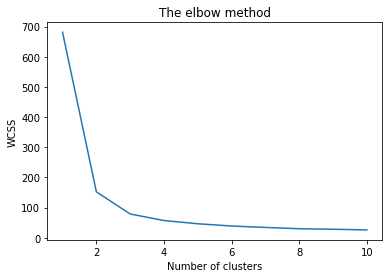

In [34]:
x = iris.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

mplt.plot(range(1, 11), wcss)  #WCSS= Within cluster sum of squares
mplt.title('The elbow method')
mplt.xlabel('Number of clusters')
mplt.ylabel('WCSS')
mplt.show()

#### From above figure, which has a shape of elbow. This method for determinig the optimum numbers of clustres is know as "The Elbow Method". The optimum numbers of clusters is the point, at which first elbow occures. In the present data set elbow occures at "3", so the optimum numbers of clusters is "3". Thus, for further visualization the optimum numbers of samples is taken as "3".

## Kmeans and Cluster Visualization

### Kmeans classifier

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising first two colums

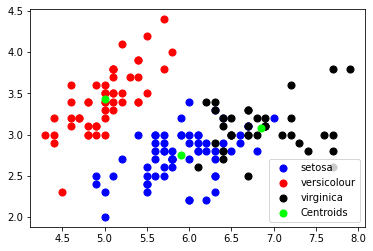

In [36]:
mplt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'setosa')
mplt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'red', label = 'versicolour')
mplt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'black', label = 'virginica')

# Clusters' Centroids
mplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 50, c = 'lime', label = 'Centroids')
mplt.legend()